In [1]:
# importing libraries
import numpy as np
import pandas as pd
import scanpy as sc
import os
from sklearn.decomposition import SparsePCA
%run Functions.ipynb

In [ ]:
# Saving/Loading adata
adata = sc.read_csv('/data/bioprotean/RNA/Fournier/GSE199460_normalized_expr.total_GSE199460_cells.sctransform.csv.gz')

In [ ]:
# Transposing the adata
adata = adata.transpose()

In [3]:
# Setting parameters
n_features = 20
sparsity = 1

In [ ]:
# Running dimension reduction
spca = SparsePCA(alpha = sparsity, n_components = n_features, random_state = 0, n_jobs = -1)
features = spca.fit_transform(adata.X)
weights = spca.components_

In [ ]:
# Saving the features and weights in adata object
adata.obsm['X_pca'] = features
adata.varm['PCs'] = weights.transpose()

In [ ]:
# Saving/Loading data
adata.write_h5ad('/data/bioprotean/RNA/Fournier/GSE199460_normalized_expr.total_GSE199460_cells.sctransform_spca1_20f.h5ad')

In [2]:
# Loading data
adata = sc.read_h5ad('/data/bioprotean/RNA/Fournier/GSE199460_normalized_expr.total_GSE199460_cells.sctransform_spca1_20f.h5ad')

In [4]:
# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors = 50, n_pcs = n_features)

# Running UMAP
sc.tl.umap(adata)

# Clustering, leiden does community detection based on optimizing modularity
sc.tl.leiden(adata, resolution = 0.5)

# Running t-SNE
sc.tl.tsne(adata, n_pcs = n_features, perplexity = 50)

# Ranking gene groups
sc.tl.rank_genes_groups(adata, 'leiden', method = 'wilcoxon')

# Loading/Saving
adata.write_h5ad('/data/bioprotean/RNA/Fournier/GSE199460_normalized_expr.total_GSE199460_cells.sctransform_spca1_20f_analyzed.h5ad')

**Loading the data**

In [2]:
# Loading/Saving
adata = sc.read_h5ad(f'/data/bioprotean/RNA/Jordao/GSE118948/adata/concat_T_union_zero_filter1_norm_log_spca20_a1_analyzed.h5ad')

In [11]:
adata.X.shape

(26821, 19505)

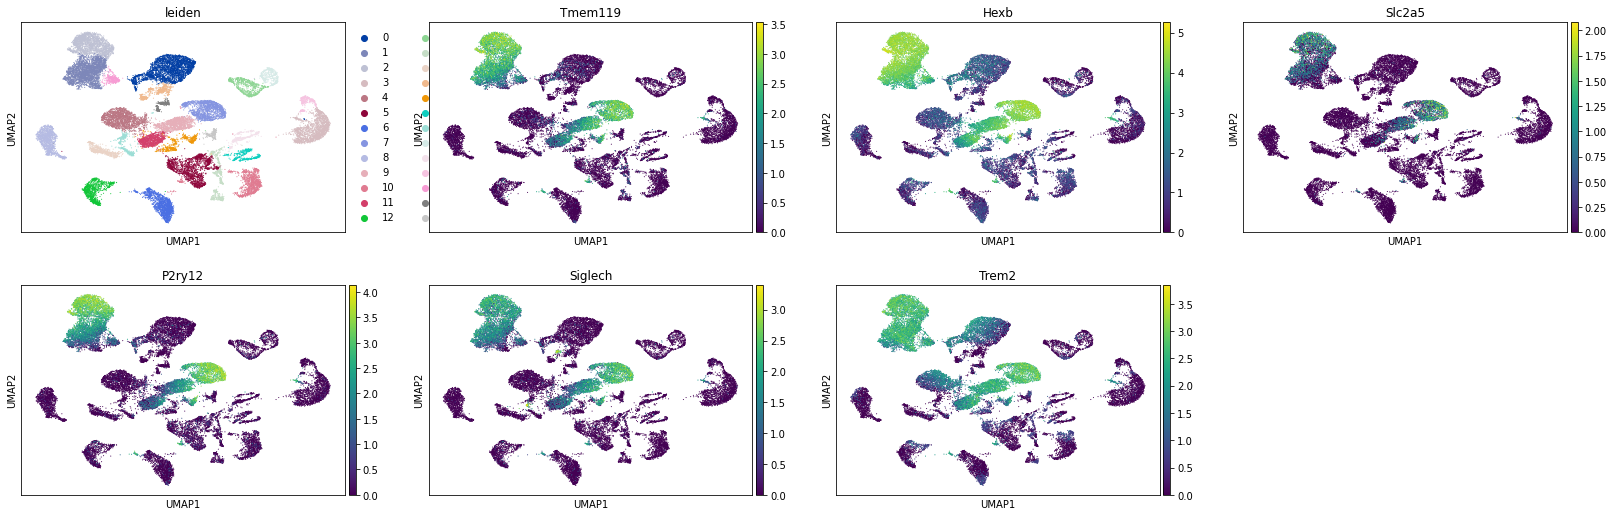

In [5]:
'''
Microglial markers.
'''
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['leiden','Tmem119','Hexb','Slc2a5','P2ry12','Siglech','Trem2'])

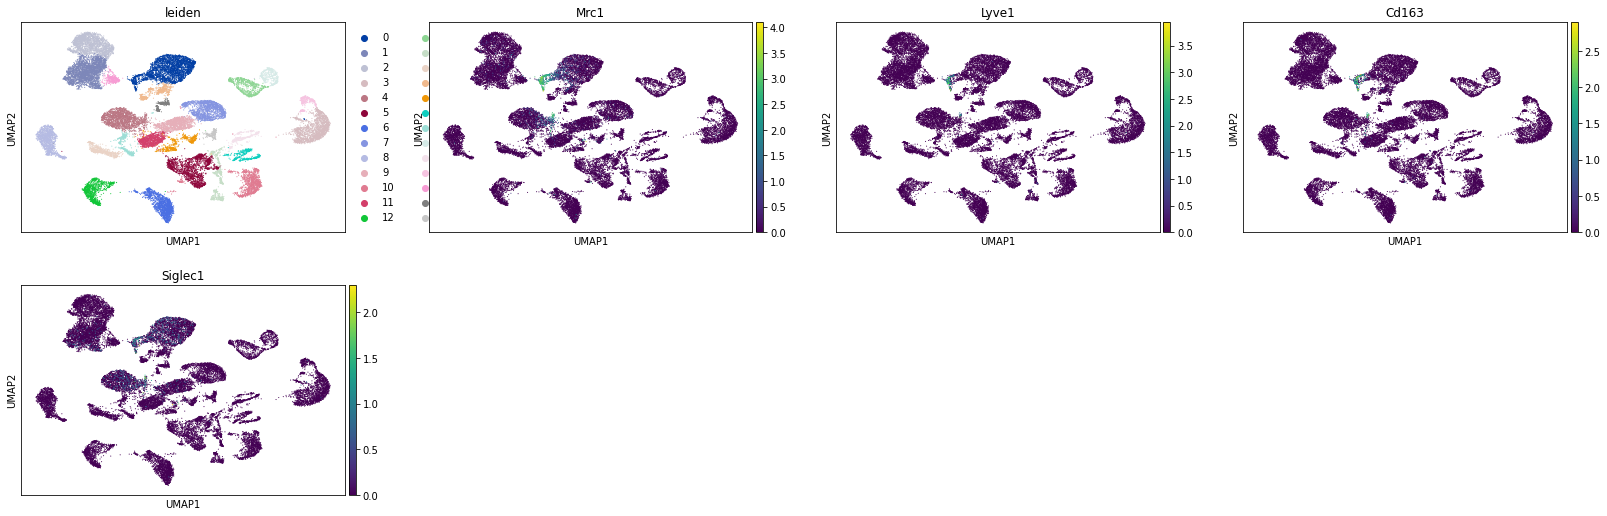

In [6]:
'''
CAM markers.
'''
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['leiden','Mrc1','Lyve1','Cd163','Siglec1'])

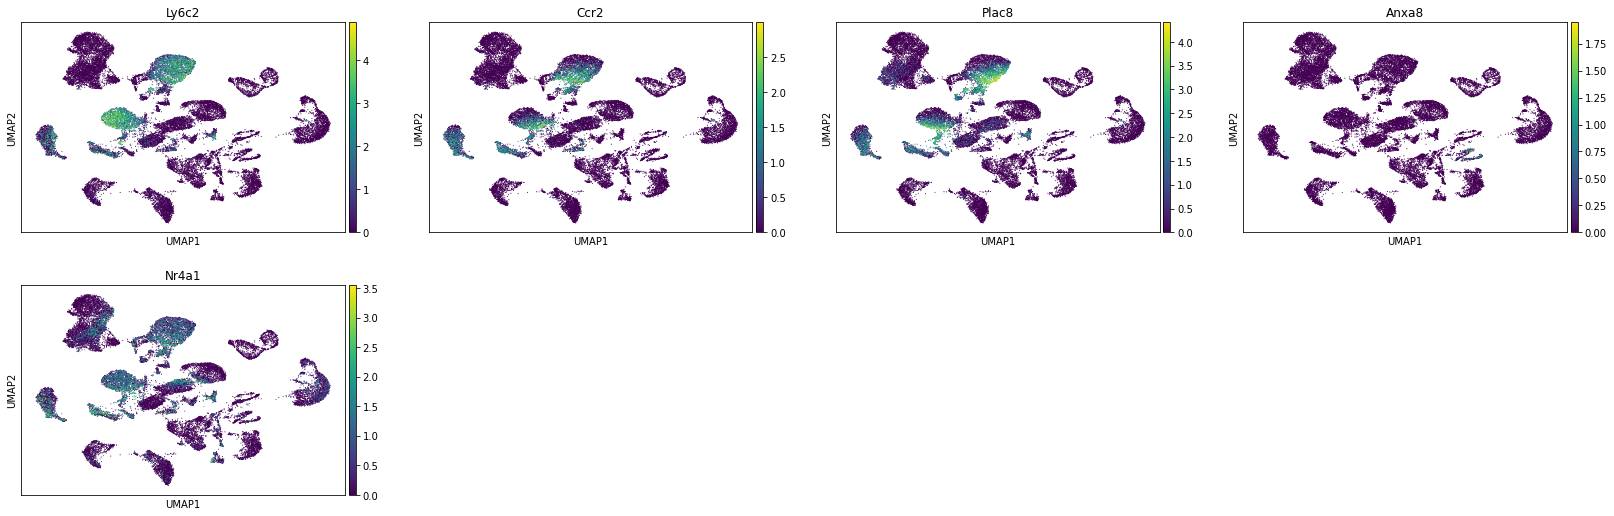

In [7]:
'''
Monocyte-derived markers.
'''
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['Ly6c2','Ccr2','Plac8','Anxa8','Nr4a1'])

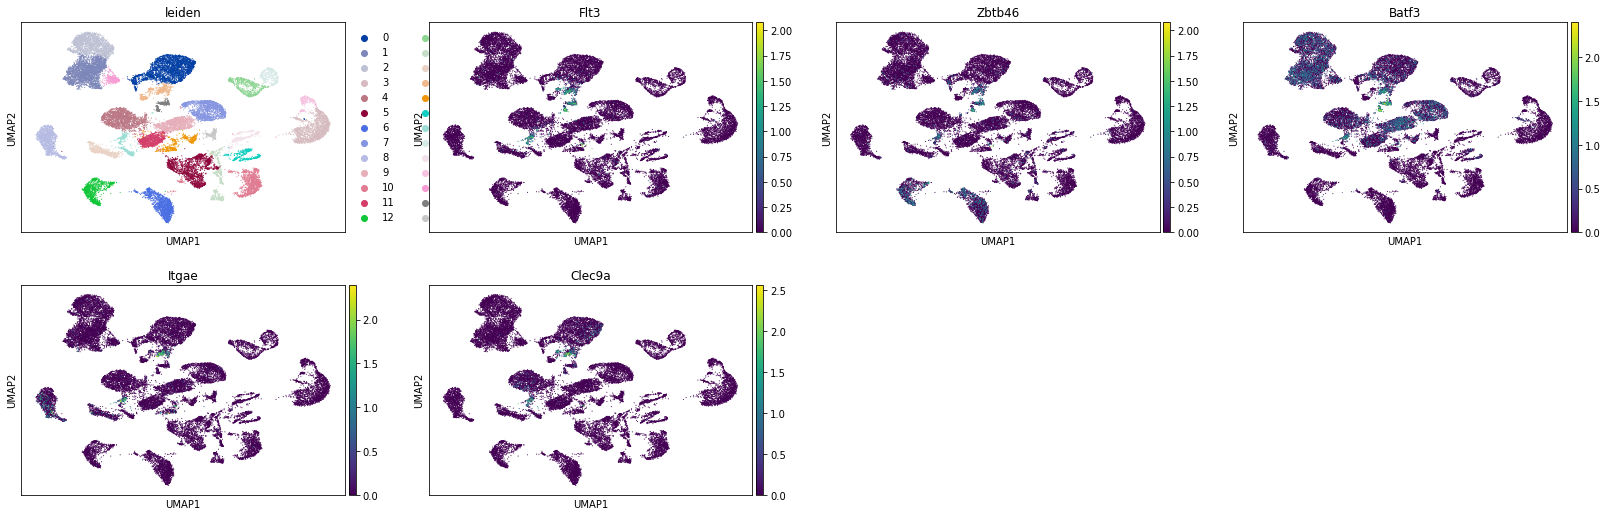

In [8]:
'''
DC markers.
'''
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['leiden','Flt3','Zbtb46','Batf3','Itgae','Clec9a'])

In [ ]:
# Annotating for the batch title
adata = batch_annotate(adata)

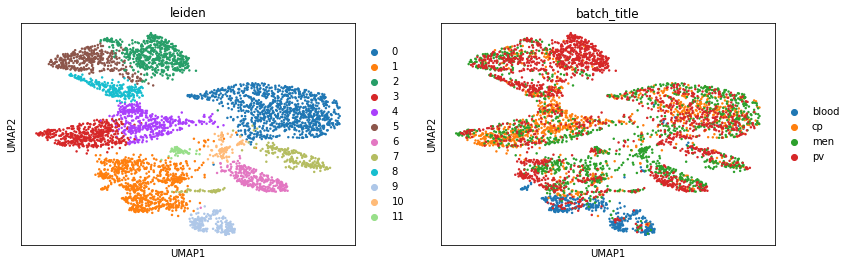

In [20]:
sc.pl.umap(adata, color = ['leiden','batch_title'])

In [ ]:
# Annotating for EAE
adata = EAE_annotate(adata)

... storing 'EAE' as categorical


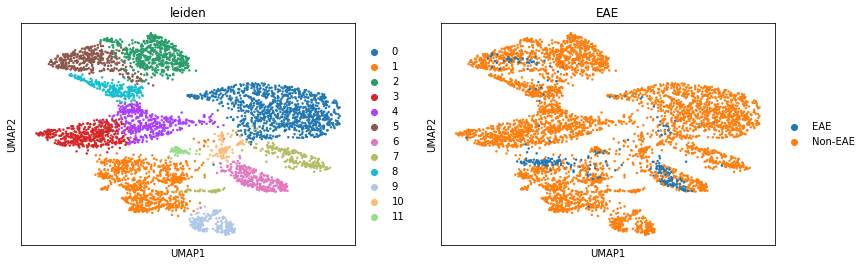

In [19]:
sc.pl.umap(adata, color = ['leiden','EAE'])

**Visualizing**

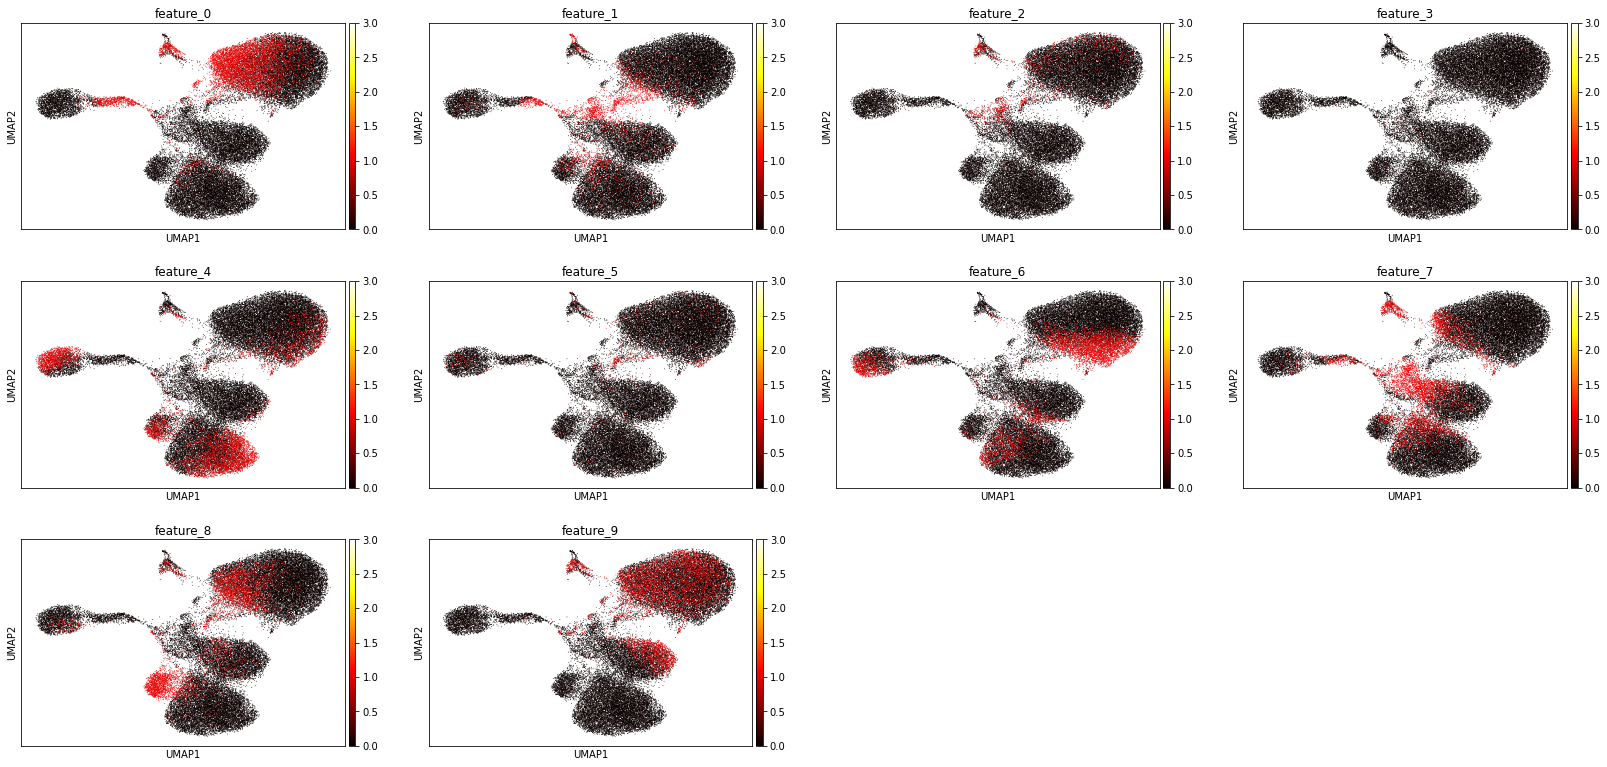

In [3]:
# Annotating the features
adata = annotate_features(adata)

# Visualizing a feature
features_list = [f'feature_{f}' for f in range(adata.obsm['X_pca'].shape[1])]
# features_list = ['feature_0', 'feature_1', 'feature_2']
# features_list.append('leiden')
sc.pl.umap(adata, color=features_list, color_map = 'hot', vmax = 3)
# save = '_SPCA_a1_feature1.svg'

/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/i

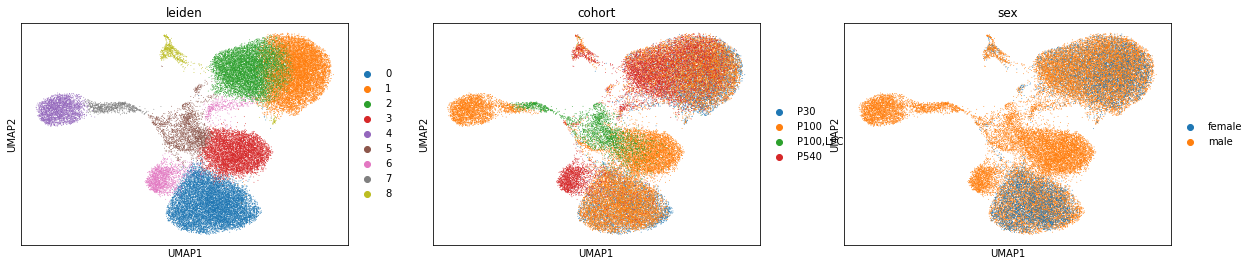

In [4]:
'''
Visualizing cohorts and sex

# Pythagorean sex values
Male: 3
Female: 4

# Cohorts
age/condition : cohort
E14: 0
P4/P5: 1
P30: 2
P100: 3
P540: 4
LPC: 5
'''

# Annotating age
adata = age_annotate(adata)

# Annotating sex
adata = sex_annotate(adata)

# Annotating cohort
adata = cohort_annotate(adata)

sc.pl.umap(adata, color = ['leiden','cohort','sex'])
# save = '_union_spca_leiden_cohort_sex.png'

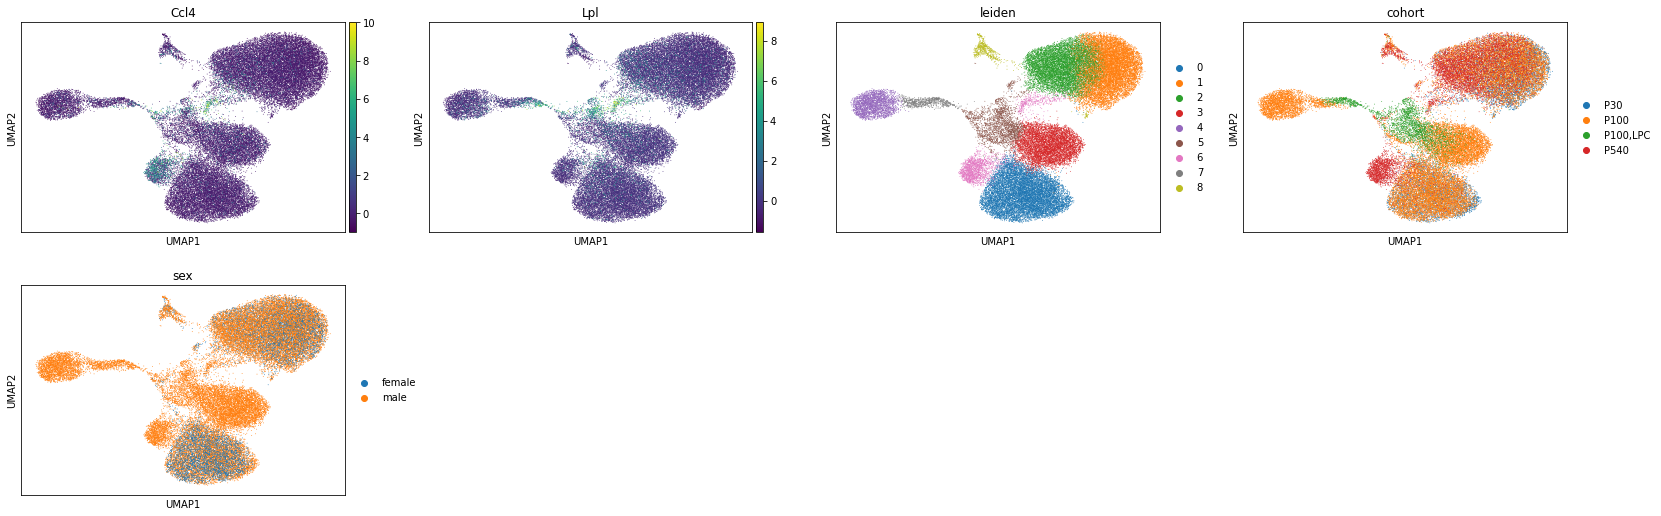

In [5]:
'''Visualizing Cytokines'''
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['Ccl4','Lpl','leiden','cohort','sex'])

**Tracking cells**

In [18]:
'''
Loading complete dataset with 50 features
'''

# Loading/Saving
adata_full = sc.read_h5ad('/data/bioprotean/RNA/Hammond/preprocessing/adult_cells/\
GSE121654_T_union_concat_zero_filter_MTremoved_adult_norm_log_reg_scale_\
spca50_a1_neigh50_umap_leiden_cellannot.h5ad')

In [19]:
# Adding a variable to the observations
# This new variable leiden_full shows the cluster number in full dataset
adata.obs['leiden_full'] = adata_full.obs['leiden']

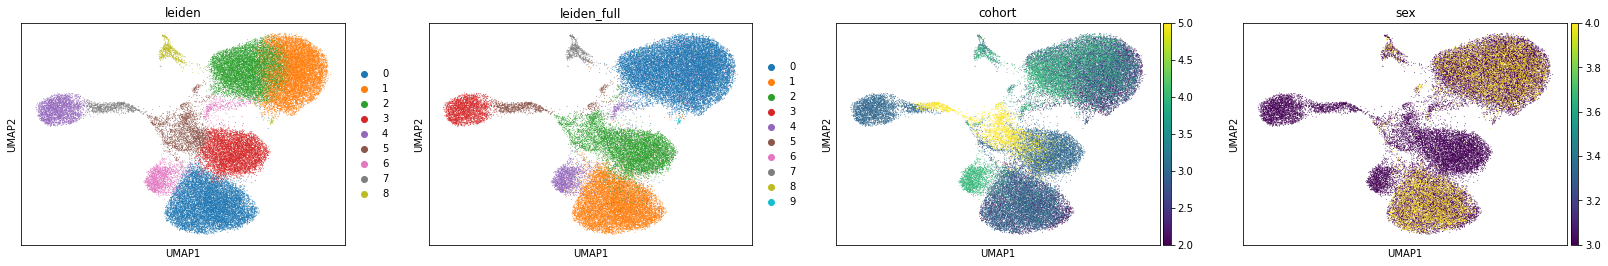

In [20]:
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['leiden','leiden_full','cohort','sex'])

**Re-doing Clustering**

In [16]:
# Checking a different Leiden clustering parameter
# Clustering, leiden does community detection based on optimizing modularity
sc.tl.leiden(adata, resolution = 0.5)

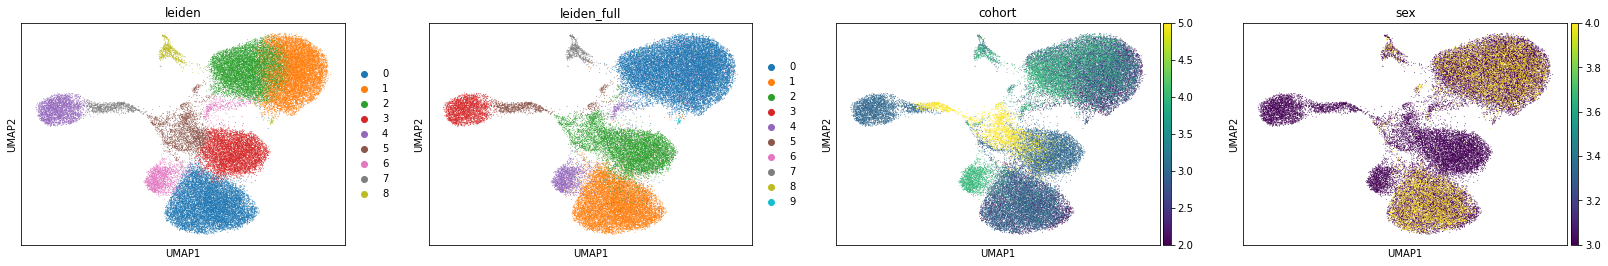

In [17]:
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['leiden','leiden_full','cohort','sex'])

# Recapitulate data with smaller gene set

In [25]:
# Making the weight dataframe
weights_df = weights_dataframe(adata)

# Making a list of top n genes for each feature
n_genes = 13
weighted_genes_list = topN_genes_list(adata, n_genes = n_genes, abs_values = True)
print("Number of genes: ", len(weighted_genes_list))

Number of genes:  114


In [29]:
# Subsetting the data to the selected genes
adata = adata[:, weighted_genes_list]
print("Number of genes: ", adata.X.shape[1])

Number of genes:  114


**Running SPCA**

In [30]:
# Setting parameters
n_features = 10
sparsity = 1

# Running dimension reduction
spca = SparsePCA(alpha = sparsity, n_components = n_features, random_state = 0, n_jobs = -1)
features = spca.fit_transform(adata.X)
weights = spca.components_

In [31]:
# Saving the features and weights in adata object
adata.obsm['X_pca'] = features
adata.varm['PCs'] = weights.transpose()

In [32]:
# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors = 50, n_pcs = n_features)

In [33]:
# Running UMAP
sc.tl.umap(adata)

In [ ]:
# Clustering, leiden does community detection based on optimizing modularity
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
# Running t-SNE
sc.tl.tsne(adata, n_pcs=n_features, perplexity=50)

In [ ]:
# Ranking gene groups
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

In [ ]:
# Saving/Loading data
n_features = 10
n_genes = 13
adata.write_h5ad(f'/data/bioprotean/RNA/Hammond/preprocessing/adult_cells/recap/\
GSE121654_adult_spca{n_features}_top{n_genes}_spca{n_features}_a1_processed.h5ad')

In [6]:
# Saving/Loading data
n_features = 10
n_genes = 13
adata_sub = sc.read_h5ad(f'/data/bioprotean/RNA/Hammond/preprocessing/adult_cells/recap/\
GSE121654_adult_spca{n_features}_top{n_genes}_spca{n_features}_a1_processed.h5ad')

/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/i

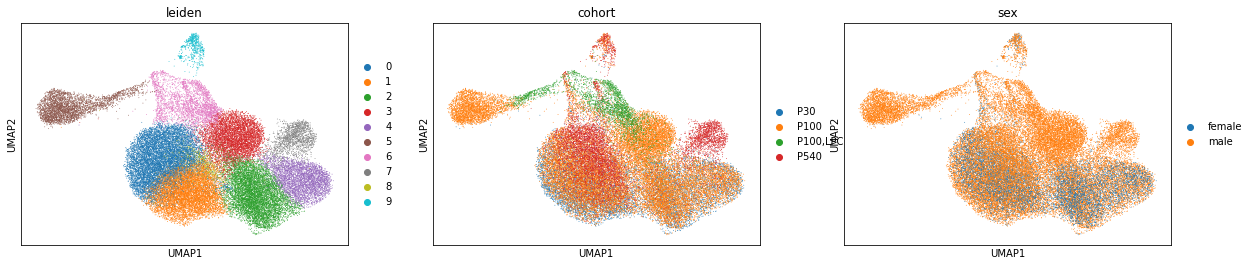

In [7]:
'''
Visualizing cohorts and sex

# Pythagorean sex values
Male: 3
Female: 4

# Cohorts
age/condition : cohort
E14: 0
P4/P5: 1
P30: 2
P100: 3
P540: 4
LPC: 5
'''

# Annotating age
adata_sub = age_annotate(adata_sub)

# Annotating sex
adata_sub = sex_annotate(adata_sub)

# Annotating cohort
adata_sub = cohort_annotate(adata_sub)

sc.pl.umap(adata_sub, color = ['leiden','cohort','sex'])
# save = '_union_spca_leiden_cohort_sex.png'

In [8]:
# Adding a variable to the observations
# This new variable leiden_full shows the cluster number in full dataset
adata_sub.obs['leiden_full'] = adata.obs['leiden']

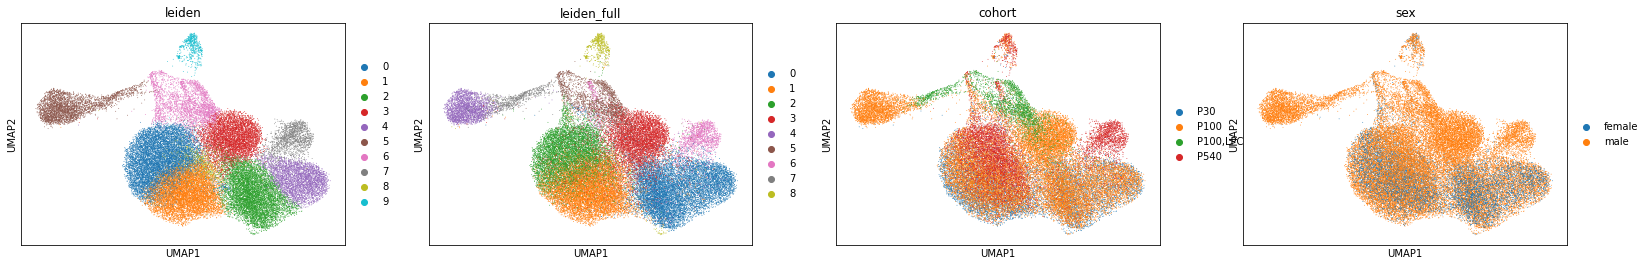

In [9]:
# Visualizing new and previous leiden clusters
sc.pl.umap(adata_sub, color = ['leiden','leiden_full','cohort','sex'])

In [ ]:
# Visualizing new and previous leiden clusters
sc.pl.umap(adata_sub, color = ['Cxcl10'])

**Gene Symbols List**

In [4]:
# List of symbols
symbols_list = adata_sub.var.index.tolist()

In [8]:
# Saving to file
with open("/data/bioprotean/repos/momo/microglia_RNA/Hammond/files/symbols.txt", 'w') as output:
    for row in symbols_list:
        output.write(row + '\n')

# Checking for Cytokines

In [42]:
with open("/data/bioprotean/RNA/Hammond/cytokines_names.txt", "r") as text_file:
    lines = text_file.readlines()

    cytokines_list = []

    for l in lines:
        as_list = l.split(", ")
        cytokines_list.append(as_list[0].replace("\n", ""))
        #ingredients.append(as_list[1].replace("\n", ""))

    print(cytokines_list)

['Defb48', 'Scube3', 'Gm13277', 'Gm13276', 'Gm13275', 'Gm13272', 'Gm13271', 'Chil6', 'Il6ra', 'Chrd', 'Ccl21c', 'Psg22', 'Ifna12', 'Ifnl2', 'Ucn', 'Lta', 'Ltb', 'Osm', 'Adam23', 'Tnfsf14', 'Il22', 'Il22b', 'Chrdl2', 'Ccl9', 'Defb6', 'Ccl8', 'Thpo', 'Cxcl1', 'Chil5', 'Il17f', 'Lbp', 'Prl7b1', 'Cd160', 'Lepr', 'Ifna14', 'Ccbe1', 'Ltbp4', 'Gdf2', 'Sectm1b', 'Ifnar2', 'Nog', 'Il23a', 'Angpt1', 'Ccl26', 'Ccl12', 'Tnfsf18', 'Ifnk', 'Cxcl10', 'Cxcl9', 'Hjv', 'Prl4a1', 'Prl6a1', 'Prl7a1', 'Prl7a2', 'Enpp1', 'Nodal', 'Serpinf2', 'Tnfrsf18', 'Cmtm7', 'Cmtm5', 'Zp3', 'Ccl24', 'Ifnl3', 'Hgf', 'Prl8a8', 'Pla2r1', 'Ifnab', 'Defb14', 'Il17b', 'Cd47', 'Itga4', 'C1qtnf3', 'Prl3c1', 'Defb3', 'Cntfr', 'Tnfsf15', 'Ccl7', 'Grem2', 'Grem1', 'Cmtm2b', 'Ctf1', 'Prl8a6', 'Prl7d1', 'Prl3b1', 'Prl3d1', 'Ccl21a', 'Ccl21b', 'Pgf', 'Adcyap1', 'Chrdl1', 'Defb5', 'Il21', 'Il20', 'Il19', 'Lpl', 'Wnt9b', 'Lifr', 'Ly96', 'Xcl1', 'Nbl1', 'Pglyrp4', 'Cxcl16', 'Bmp8a', 'Tnfsf4', 'Twsg1', 'Defb46', 'Gdf7', 'Gdf6', 'Gdf5', '

In [47]:
# List of genes in the minimal gene set
minimal_genes_list = adata.var.index.tolist()

In [48]:
list(set(minimal_genes_list).intersection(cytokines_list))

['Ccl4', 'Lpl']

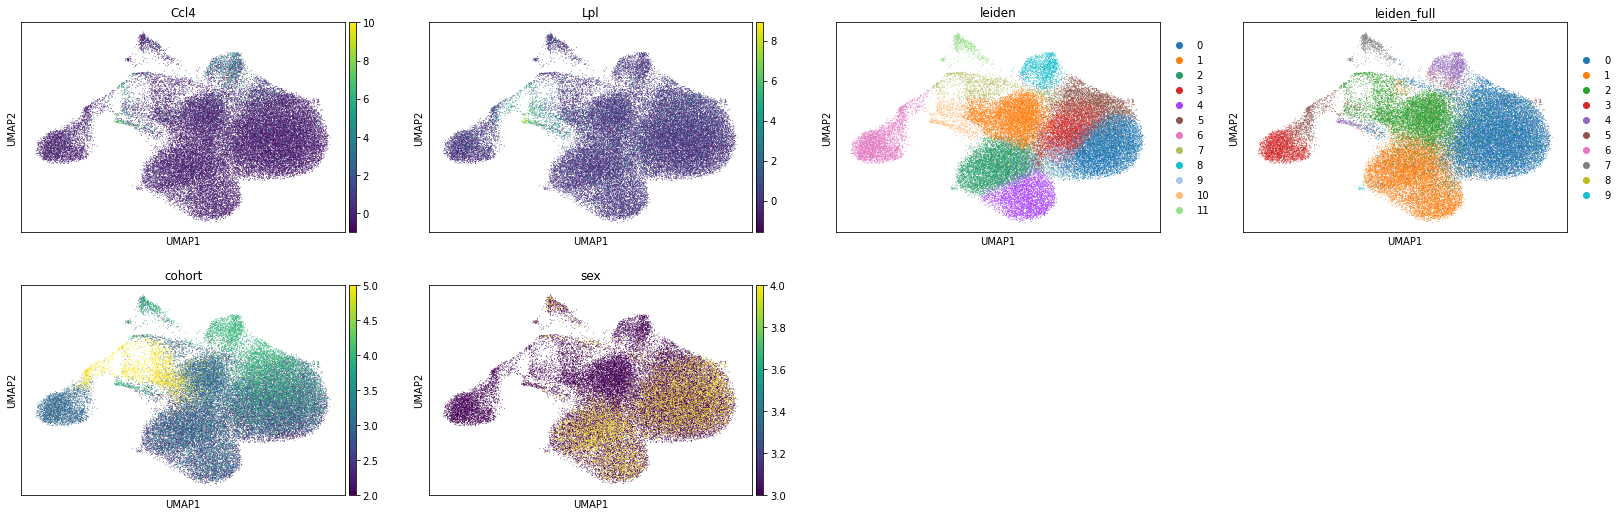

In [49]:
# Visualizing new and previous leiden clusters
sc.pl.umap(adata, color = ['Ccl4','Lpl','leiden','leiden_full','cohort','sex'])